**Question 1:**

Size of Matrices -> n * k and k * m

Total Number of Elements in Final Matrix = n * m

For an element C[i,j], C[i,j] = Σ(A[i,p] * B[p,j]) for all p = 0 to k-1. So, there are k multiplications and k-1 additions performed for 1 element.

Therefore, total **n * m * k multiplications** and **n * m * (k-1) additions** are needed to perform a matrix multiplication between a (n, k) and (k, m) matrix

**Question 2:**

In [49]:
import numpy as np
import time

In [50]:
A = [[1, 2, 3], [4, 5, 6]]         # 2*3 Matrix
B = [[7, 8], [9, 10], [11, 12]]    # 3*2 Matrix

def mm(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for j in range(m)] for i in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

start = time.time()
ans1 = mm(A, B)
end = time.time()
ll_time = end - start

print("Result using list of lists:", ans1)
print("Time:", ll_time)

###############################################################

A_np = np.array(A)
B_np = np.array(B)
start = time.time()
ans2 = np.dot(A_np, B_np)
end = time.time()
np_time = end - start

print("Result using NumPy:")
print(ans2)
print("Time:",np_time)

if (ll_time < np_time):
  print("list  of lists method is faster.")
else:
  print("NumPy is faster.")

Result using list of lists: [[58, 64], [139, 154]]
Time: 0.0005536079406738281
Result using NumPy:
[[ 58  64]
 [139 154]]
Time: 0.0002014636993408203
NumPy is faster.


NumPy is usually faster than the list to lists method. It is mainly because of optimized operations in NumPy and its homogenous behaviour which make its better than normal Python code which has nested loops. Along with this, the functions in NumPy are written in C which again makes it run faster than pure Python Code.

Here the list to list methods is faster because the arrays are small in size here. NumPy is advantageous when a relatively much bigger list is chosen.

**Question 3:**

By the first method, we are iterating n elements for n/2 times which means that the time complexity for this is O($n^2$).

Second method is to use a sorting algorithm and then extract the (n/2)th element. The average time for most sorting algorithms is O(nlog(n)) which is faster than the previous method.

In [51]:
# METHOD 1
def high_elem(arr):
    arr2 = arr.copy()
    n = len(arr2)
    if n % 2 == 0:
      for i in range(n//2):
        max_val = max(arr2)
        arr2.remove(max_val)
      median = (max_val + max(arr2)) / 2
    else:
      for i in range(n // 2):
        max_val = max(arr2)
        arr2.remove(max_val)
      median = max(arr2)
    print(arr)
    print(arr2)
    return median

# METHOD 2
def median_sort(arr):
    arr1 = sorted(arr)
    n = len(arr1)
    if n % 2 == 1:
        return arr1[n // 2]
    else:
        return (arr1[(n // 2) - 1] + arr1[n // 2]) / 2

arr = [3,6,1,7,4,2,5]

# Using Method 1
start = time.time()
m1 = high_elem(arr)
end = time.time()
t1 = end - start

# Using Method 2
start = time.time()
m2 = median_sort(arr)
end = time.time()
t2 = end - start

# Using NumPy
arr = np.array(arr)
start = time.time()
m3 = np.median(arr)
end = time.time()
t3 = end - start

print(f"Median using method 1:", m1)
print(f"Time taken: {t1*1000} ms")

print(f"Median using method 2:", m2)
print(f"Time taken: {t2*1000} ms")

print(f"Median using NumPy:", m3)
print(f"Time taken: {t3*1000} ms")

[3, 6, 1, 7, 4, 2, 5]
[3, 1, 4, 2]
Median using method 1: 4
Time taken: 1.390695571899414 ms
Median using method 2: 4
Time taken: 0.06175041198730469 ms
Median using NumPy: 4.0
Time taken: 0.44155120849609375 ms


**Question 4:**
Gradient of a function in x and y = (δf/δx , δf/δy)

δf/δx = δ($x^2y + y^3sin(x)$)/δx = $2xy + y^3cos(x)$

δf/δy = δ($x^2y + y^3sin(x)$)/δy = $x^2 + 3y^2sin(x)$

Therefore, gradient = ($2xy + y^3cos(x)$ , $x^2 + 3y^2sin(x)$)

**Question 5:**

In [52]:
import jax
import jax.numpy as jnp

from jax import random
from jax import grad,value_and_grad
from jax.test_util import check_grads

In [53]:
# f(x) = x1^2 + x2^2
def f(x,y):
    return ((x**2)*y + (y**3)*jnp.sin(x))

grad_f = jax.grad(f, argnums=(0, 1))

# input = jnp.array([[0.0, 1.0], [1.0, 3.0], [4.9, 2.6]])
# for i in input:
#     print("JAX Gradient Function: ", grad_f(i))
print("JAX Gradient Function: ", grad_f(1.0,2.0))

JAX Gradient Function:  (Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))


**Question 6:**

In [54]:
import sympy as sp
from sympy import *

x, y = sp.symbols('x y')
f_x = sp.diff((x**2)*y + (y**3)*sp.sin(x), x)
f_y = sp.diff((x**2)*y + (y**3)*sp.sin(x), y)
print("Gradient of the function is:")
print(f"({f_x}, {f_y})")

Gradient of the function is:
(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


**Question 7:**

In [55]:
student_records = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        },
        'Branch 2': {}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

**Question 8:**

In [56]:
class Database:
    def __init__(self):
        self.years = []
    def add_year(self, year):
        self.years.append(year)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks
'''
student1 = Student(1, 'N', {'Maths': 100, 'English': 70})

branch1 = Branch('Branch 1')
branch1.students.append(student1)

year2022 = Year(2022)
year2022.branches.append(branch1)

database = Database()
database.add_year(year2022)
'''

"\nstudent1 = Student(1, 'N', {'Maths': 100, 'English': 70})\n\nbranch1 = Branch('Branch 1')\nbranch1.students.append(student1)\n\nyear2022 = Year(2022)\nyear2022.branches.append(branch1)\n\ndatabase = Database()\ndatabase.add_year(year2022)\n"

**Question 9:**

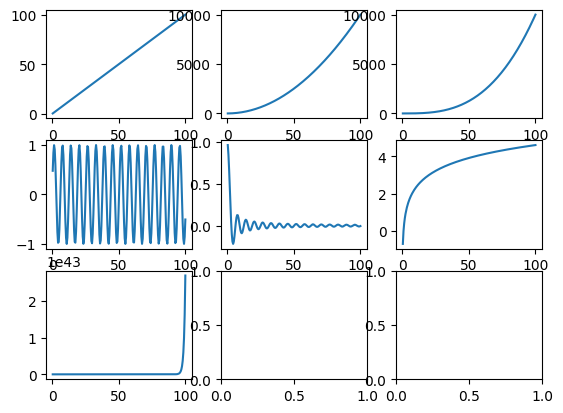

In [57]:
import matplotlib.pyplot as plt
import math

x = np.arange(0.5,100.5,0.5)
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)
# for i in range(1,8):
#   plt.plot(x,y{i})
figure, axis = plt.subplots(3, 3)
axis[0,0].plot(x,y1)
axis[0,1].plot(x,y2)
axis[0,2].plot(x,y3)
axis[1,0].plot(x,y4)
axis[1,1].plot(x,y5)
axis[1,2].plot(x,y6)
axis[2,0].plot(x,y7)

**Question 10:**

In [58]:
import pandas as pd

mat = np.random.uniform(1, 2, size=(20, 5))
data_frame = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

col = data_frame.std().idxmax()
row = data_frame.mean(axis=1).idxmin()

print("DataFrame:")
print(data_frame)

print("\nColumn with the highest standard deviation:", col)
print("Row with the lowest mean:", row)

DataFrame:
           a         b         c         d         e
0   1.331081  1.638872  1.446524  1.082651  1.204674
1   1.126142  1.397103  1.907113  1.914821  1.391922
2   1.339142  1.050349  1.597050  1.457817  1.162639
3   1.864069  1.168882  1.671740  1.868920  1.562417
4   1.805050  1.821541  1.114749  1.276608  1.003142
5   1.312501  1.159565  1.505125  1.214559  1.177436
6   1.613554  1.687142  1.337880  1.021953  1.433922
7   1.093773  1.335978  1.275916  1.708999  1.676028
8   1.697476  1.327660  1.777826  1.951370  1.727219
9   1.035995  1.085974  1.535494  1.613035  1.304623
10  1.414138  1.624189  1.955557  1.102751  1.632418
11  1.018630  1.701668  1.365635  1.522149  1.640228
12  1.996910  1.327786  1.574664  1.755408  1.697118
13  1.649502  1.807103  1.965180  1.027155  1.662288
14  1.554787  1.416085  1.351608  1.594729  1.214626
15  1.385331  1.688861  1.345427  1.428879  1.976855
16  1.652214  1.783890  1.259263  1.900633  1.832718
17  1.889258  1.685670  1.500451  1

**Question 11:**

In [59]:
data_frame['f'] = data_frame[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
data_frame['g'] = np.where(data_frame['f'] < 8, 'LT8', 'GT8')
cnt_lt8 = (data_frame['g'] == 'LT8').sum()
lt8 = data_frame.loc[data_frame['g'] == 'LT8', 'f'].std()
gt8 = data_frame.loc[data_frame['g'] == 'GT8', 'f'].std()

print("New DataFrame:")
print(data_frame)
print("\nNumber of rows where the value in column 'g' is 'LT8':", cnt_lt8)
print("Standard deviation of column 'f' for 'LT8':", lt8)
print("Standard deviation of column 'f' for 'GT8':", gt8)

New DataFrame:
           a         b         c         d         e         f    g
0   1.331081  1.638872  1.446524  1.082651  1.204674  6.703803  LT8
1   1.126142  1.397103  1.907113  1.914821  1.391922  7.737101  LT8
2   1.339142  1.050349  1.597050  1.457817  1.162639  6.606998  LT8
3   1.864069  1.168882  1.671740  1.868920  1.562417  8.136027  GT8
4   1.805050  1.821541  1.114749  1.276608  1.003142  7.021091  LT8
5   1.312501  1.159565  1.505125  1.214559  1.177436  6.369185  LT8
6   1.613554  1.687142  1.337880  1.021953  1.433922  7.094450  LT8
7   1.093773  1.335978  1.275916  1.708999  1.676028  7.090694  LT8
8   1.697476  1.327660  1.777826  1.951370  1.727219  8.481550  GT8
9   1.035995  1.085974  1.535494  1.613035  1.304623  6.575120  LT8
10  1.414138  1.624189  1.955557  1.102751  1.632418  7.729054  LT8
11  1.018630  1.701668  1.365635  1.522149  1.640228  7.248310  LT8
12  1.996910  1.327786  1.574664  1.755408  1.697118  8.351887  GT8
13  1.649502  1.807103  1.965180 

**Question 12:**

Broadcasting is a feature in NumPy that allows arithmetic operations on arrays of different shapes and sizes without reshaping them.

It is mostly done on arrays in pair wise manner and on element-by-element basis. It follows certain ground rules -
1. Dimensions of both the arrays must be equal
2. Or Dimension of one of them is 1.

If either of the above two is followed then the two arrays are compatible and you can solve them arithmetically.

Reference: https://numpy.org/doc/stable/user/basics.broadcasting.html

In [60]:
# Example 1
a = np.array([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
b = np.array([2.0, 2.0, 2.0]) # Same as b = 2

print("a * b =")
print(a*b)

# Example 2
a = np.array([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
b = np.array([2.0, 4.0, 3.0])

print("\na * b =")
print(a*b)

# Example 3
a = np.array([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
b = np.array([[2.0, 4.0, 3.0],[7.0,1.0,5.0]])

print("\na * b =")
print(a*b)

a * b =
[[ 2.  4.  6.]
 [ 8. 10. 12.]]

a * b =
[[ 2.  8.  9.]
 [ 8. 20. 18.]]

a * b =
[[ 2.  8.  9.]
 [28.  5. 30.]]


**Question 13:**

In [61]:
arr = np.array([3,6,1,7,4,2,5])

def min_idx(arr):
  min = arr[0]
  for i in range(1, len(arr)):
    if arr[i] < min:
      idx = i
      min = arr[i]
  return idx

print("Minimum index using function:", min_idx(arr))
print("Minimum index using NumPy:", np.argmin(arr))

Minimum index using function: 2
Minimum index using NumPy: 2
